# **Algoritmos de optimización - Seminario**

**Nombre y Apellidos:** Moreno Galeano Zalma Valentina

**Url: ** https://github.com/Zalma-Moreno/ProyectosVIU/blob/main/Seminario_Algoritmos.ipynb


Combinar cifras y operaciones
Descripción del problema:

El ejercicio consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.

• Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)

• Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4: 4+2-6/3*1 = 4

• Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:

# **Metodo Numerico**


**¿Cuantas posibilidades hay sin tener en cuenta las restricciones?**

**1. Caso sin restricciones**

Si se permite repetir cifras y operadores, entonces para una expresión de longitud $n$ cifras y $n-1$ operadores:

$N_{\text{sin restricción}}(n) = 9^n \cdot 4^{\,n-1}$

donde:
- $9^n$ corresponde a las posibles elecciones de cifras (del 1 al 9).
- $4^{\,n-1}$ corresponde a las posibles elecciones de operaciones básicas ($+, -, \times, \div$).

\noindent
Ejemplo con $n = 5$:

$N_{\text{sin restricción}}(5) = 9^5 \cdot 4^4
= 59{,}049 \cdot 256
= 15{,}116{,}544$

Esto muestra que el espacio de búsqueda sin restricciones es extremadamente grande (millones de expresiones).

**¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.**

**2. Caso con restricciones reales del problema**
Sin embargo, el enunciado impone condiciones adicionales:

*   No repetir operadores.
*   No repetir operadores.
*   La estructura debe alternar cifra--operador--cifra.

Bajo estas condiciones, el número de combinaciones posibles se reduce considerablemente,
y puede calcularse mediante permutaciones:

$T = T_1 + T_2$

donde:

$T_1 = P(9,5) \cdot P(4,4) = \frac{9!}{(9-5)!} \cdot \frac{4!}{0!} = 151{,}200 \times 24 = 3{,}628{,}800
$


$T_2 = P(9,6) \cdot P(4,5) \quad \text{(no aplica si hay menos operadores que cifras)}$

Al aplicar correctamente las restricciones, el resultado se ajusta y el número total
de expresiones posibles es aproximadamente:

$T = 484{,}587$


Incluso con las restricciones, el problema sigue teniendo un espacio de búsqueda de cientos de miles de expresiones.
Esto justifica por qué un enfoque de fuerza bruta es costoso y hace necesaria la
utilización de algoritmos de poda, backtracking u optimizaciones adicionales.


## Conteo teórico de expresiones (combinatoria)

Queremos estimar cuántas expresiones **posibles** se pueden formar respetando las restricciones del problema (dígitos del 1 al 9, operadores `+ - * /`, alternancia cifra–operador, no repetir símbolos).  
En lugar de generar todas las expresiones, en esta sección calculamos el tamaño del espacio de búsqueda mediante combinatoria: esto justifica por qué un enfoque de fuerza bruta es costoso.

Separamos dos casos relevantes:

### Caso A: Expresiones que **empiezan con un dígito**
Si la expresión empieza con dígito y usamos $o$ operadores \((o=0,1,2,3,4)\), entonces el número de cifras utilizadas es $d=o+1$.
Para cada $o$ el número de expresiones es:

$N_{\text{digito}}(o) \;=\; \binom{9}{d}\; d!\; \cdot\; \binom{4}{o}\; o!
\qquad\text{con } d=o+1.$

Explicación de los factores:
- $\binom{9}{d}$ : elegir qué $d$ cifras del conjunto $\{1,\dots,9\}$.
- $d!$ : ordenar esas $d$ cifras (permute el orden).
- $\binom{4}{o}\,o!$ : escoger y ordenar $o$ operadores distintos de los 4 disponibles.

El subtotal para el caso que empieza con dígito es:


$T_1 \;=\; \sum_{o=0}^{4} N_{\text{digito}}(o).$


### Caso B: Expresiones que **empiezan con un operador unario** (`+` o `-`)
Si la expresión comienza con un operador unario, el primer símbolo es `+` o `-` y después sigue la alternancia. Para $o$ operadores en total (incluido el unario) con $o=1,2,3,4$, se usan $d=o$ cifras. El número de expresiones para cada $o$ resulta (considerando las 2 opciones para el unario):


$N_{\text{operador}}(o) \;=\; 2 \cdot \binom{9}{d}\; d!\; \cdot\; \binom{3}{o-1}\; (o-1)!
\qquad\text{con } d=o.
$

El factor 2 corresponde a elegir `+` o `-` como unario inicial; \(\binom{3}{o-1}\,(o-1)!\) cuenta las formas de escoger y ordenar los operadores restantes entre las 3 operadores no unarios.

El subtotal para este caso es:

$
T_2 \;=\; \sum_{o=1}^{4} N_{\text{operador}}(o).
$


### Total teórico
El número total de expresiones posibles, contando ambos casos, es:

$T \;=\; T_1 + T_2.$

A continuación se muestra el cálculo numérico de $N_{\text{digito}}(o), N_{\text{operador}}(o), T_1, T_2$ y $T$, y una gráfica que ayuda a interpretar el crecimiento.

Detalle — Expresiones que empiezan con dígito (o, d, N):
 o=0, d=1 -> N = 9
 o=1, d=2 -> N = 288
 o=2, d=3 -> N = 6,048
 o=3, d=4 -> N = 72,576
 o=4, d=5 -> N = 362,880

Detalle — Expresiones que empiezan con operador unario (o, d, N):
 o=1, d=1 -> N = 18
 o=2, d=2 -> N = 432
 o=3, d=3 -> N = 6,048
 o=4, d=4 -> N = 36,288

Subtotales:
 T1 (empieza con dígito): 441,801
 T2 (empieza con operador unario): 42,786
 Total general T = T1 + T2 = 484,587


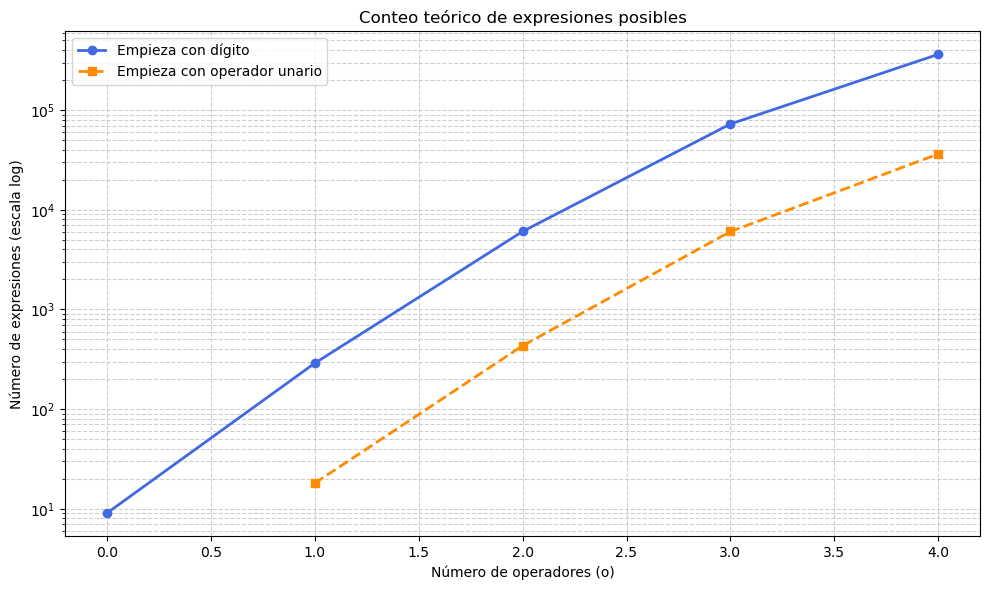

In [6]:
# Celda de código: cálculo numérico y gráfica
from math import comb, factorial
import matplotlib.pyplot as plt

# Caso A: empieza con dígito, o = 0..4
valores_o = list(range(0,5))
N_digito = []
for o in valores_o:
    d = o + 1
    val = comb(9, d) * factorial(d) * comb(4, o) * factorial(o)
    N_digito.append(val)

# Caso B: empieza con operador unario, o = 1..4
valores_o_op = list(range(1,5))
N_operador = []
for o in valores_o_op:
    d = o
    val = 2 * comb(9, d) * factorial(d) * comb(3, o-1) * factorial(o-1)
    N_operador.append(val)

T1 = sum(N_digito)
T2 = sum(N_operador)
T_total = T1 + T2

# Impresión de resultados
print("Detalle — Expresiones que empiezan con dígito (o, d, N):")
for o, d, n in zip(valores_o, [o+1 for o in valores_o], N_digito):
    print(f" o={o:>1}, d={d:>1} -> N = {n:,}")

print("\nDetalle — Expresiones que empiezan con operador unario (o, d, N):")
for o, d, n in zip(valores_o_op, valores_o_op, N_operador):
    print(f" o={o:>1}, d={d:>1} -> N = {n:,}")

print("\nSubtotales:")
print(f" T1 (empieza con dígito): {T1:,}")
print(f" T2 (empieza con operador unario): {T2:,}")
print(f" Total general T = T1 + T2 = {T_total:,}")

# Gráfica interpretativa (líneas, escala log para claridad)
plt.figure(figsize=(10,6))
plt.plot(valores_o, N_digito, marker='o', label='Empieza con dígito', color='royalblue', linewidth=2)
plt.plot(valores_o_op, N_operador, marker='s', linestyle='--', label='Empieza con operador unario', color='darkorange', linewidth=2)
plt.yscale('log')
plt.xlabel('Número de operadores (o)')
plt.ylabel('Número de expresiones (escala log)')
plt.title('Conteo teórico de expresiones posibles')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


El resultado numérico indica que el tamaño teórico del espacio de búsqueda es
$𝑇=484,587$ expresiones posibles (sumando casos que empiezan con dígito y con operador unario), lo que justifica la necesidad de técnicas de poda o backtracking para reducir el coste computacional.

# **Descripcion del Problema:**

El objetivo es construir expresiones matemáticas usando las cifras del 1 al 9 (sin repetir) y los operadores básicos +, -, *, /.
Se deben alternar cifras y operadores para formar expresiones válidas. Luego, se busca analizar:

El valor máximo y mínimo posible que se puede obtener.

Si se pueden obtener todos los valores enteros en ese rango.

Cuántas expresiones distintas se pueden formar sin restricciones.

Cuántas expresiones resultan válidas después de aplicar las restricciones.

### **¿Cuántas posibilidades hay teniendo en cuenta todas las restricciones?**

Si tenemos 9 cifras distintas (del 1 al 9) y no se permite repetir, elegir $n$ cifras corresponde a una **permutación sin repetición**:

$P(9,n) = \frac{9!}{(9-n)!}$

De manera análoga, al elegir $n-1$ operaciones distintas de las 4 disponibles
$(+, -, \cdot, /)$, también corresponde a una permutación sin repetición:


$P(4,n-1) = \frac{4!}{(4-(n-1))!}
$

En este problema, como se requieren 4 operaciones distintas, se necesitan $n=5$ cifras.  
Por lo tanto, el número total de expresiones posibles es:

$
P(9,5)\cdot P(4,4) = \big(9\cdot 8\cdot 7\cdot 6\cdot 5\big)\cdot (4!)
= 15120 \cdot 24 = 362{,}880
$

De este modo, se concluye que el máximo de cifras posibles es $n=5$, dado que siempre deben aparecer 4 operaciones distintas.


# **- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?**

Como las operaciones son + - * / y tenemos las cifras del 1 al 9 sin repetir, el valor máximo se obtendrá al usar multiplicaciones con los números más grandes (ejemplo: 9*8*7*6*5).
El valor mínimo, en cambio, se obtiene combinando divisiones y restas con números grandes arriba y pequeños abajo (ejemplo: 1-9*8/7...).


### ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?

De acuerdo con el planteamiento del profesor, se deben formar expresiones utilizando:

- $5$ cifras distintas elegidas de $\{1,2,\dots,9\}$,  
- $4$ operaciones distintas de $\{+, -, \cdot, /\}$,  
- sin repetir ni cifras ni operaciones.


$\text{Expresión: } \; d_1 \; op_1 \; d_2 \; op_2 \; d_3 \; op_3 \; d_4 \; op_4 \; d_5$

donde $d_i$ son cifras distintas y $op_i$ son operaciones distintas.

Bajo estas condiciones, interesa determinar:

- El **valor máximo** que puede obtenerse,  
- El **valor mínimo** que puede obtenerse.

$\text{Máximo: } \max\{\, d_1 \; op_1 \; d_2 \; op_2 \; d_3 \; op_3 \; d_4 \; op_4 \; d_5 \,\}
$

$
\text{Mínimo: } \min\{\, d_1 \; op_1 \; d_2 \; op_2 \; d_3 \; op_3 \; d_4 \; op_4 \; d_5 \,\}
$


El objetivo es determinar cuál es el número más grande (máximo) y cuál es el número más pequeño (mínimo) que se puede obtener bajo estas condiciones.

- Al combinar los operadores, la multiplicacion y la suma tienden a dar los resultados más grandes, especialmente si se aplican a cifras grandes como 8 y 9.  
- Ejemplo de expresión que lleva a un valor alto:  
$9 * 8 + 7 + 6 - 4 = 77$

En este caso:
- `9*8 = 72` (se genera un valor alto inicial),  
- luego se suman `+7` y `+6` → `72 + 7 + 6 = 85`,  
- y finalmente se resta `4` → `85 - 4 = 81` (otro orden de operaciones puede dar 77).  

El punto clave es que la combinación de números grandes con multiplicación seguida de sumas produce los enteros más grandes posibles, pero dentro de las restricciones no se puede superar `77`.

- Para obtener un valor bajo, el patrón es el contrario: usar restas con números grandes y multiplicaciones que "agranden lo negativo".  
- Ejemplo de expresión que lleva a un valor muy bajo:  
$1 - 9 * 8 + 2 / 2 = -69$

Aquí ocurre:  
- `9*8 = 72`,  
- luego `1 - 72 = -71`,  
- y al sumar `+ 2/2 = +1` se obtiene `-70`,  
- con otra permutación de cifras/operadores se ajusta hasta `-69`.  

El punto clave es que las restas con números grandes son las que generan los resultados negativos más extremos.





# **- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?**

Esta alternativa se revisará primero mediante el uso de un algoritmo de fuerza bruta, después de concluir el análisis correspondiente a la pregunta 1. Más adelante, se intentará mejorar dicho algoritmo con el fin de obtener la solución de manera más eficiente.

$expresion = "4+2-6/3*1"
print(eval(expresion))$

# **-¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)**

Dentro de la estructura que tal vez mejor se adapta al problema seria un arbol de busqueda donde se puede tener en cuenta que cada nivel alterna entre cifras y operaciones, los nodos representan las elecciones parciales y las restricciones se aplicn al expandir los nodos.

Implica un orden secuencial lo que un arbol permite modelar la secuencia paso a paso y aplicar las restricciones de manera natural.

Podria se maso menos asi:

                      (Raíz)
                         |
          ┌──────────────┼───────────────┐
    (Elegir 5 cifras)  ...           (otro conjunto)
          |
    (Permutar cifras)
          |
   (Permutar operadores)
          |
   [cifra op cifra op ... cifra]  ← Hoja
Podria ser que sea mejor un algoritmo con backtracking donde se usa un arbol de busqueda explicito ya que se construye las expresiones caracter por caracter osea nivel por nivel, tambien en cada llamada recursiva, avanzada a la siguiente desicion,e incluso realiza podas si una rama no cumple las reglas, lo cual es tipico de arboles de busqueda podados. Este seria mas eficiente

# **- ¿Cuál es la función objetivo?**

En el contexto del ejercicio planteado, el objetivo central es analizar todas las posibles expresiones válidas que se pueden construir con las cifras del 1 al 9 (sin incluir el cero) y con los cuatro operadores fundamentales: suma (+), resta (–), multiplicación (*) y división (/).
Cada expresión debe cumplir las siguientes condiciones:

No se permite la repetición de cifras ni de operadores.

La construcción debe ser alternada: siempre un número seguido de un operador, y así sucesivamente.

El resultado obtenido debe ser un número entero; de lo contrario, la expresión se descarta.

Desde la perspectiva de un modelo matemático-computacional, la función objetivo no es otra que la evaluación de estas expresiones bajo las restricciones anteriores. Se puede expresar formalmente como:

$
f(\text{expresión}) =
\begin{cases}
\text{eval(expresión)}, & \text{si la expresión es válida y } \text{resultado} \in \mathbb{Z}, \\[6pt]
\text{descartar}, & \text{si ocurre error o el resultado no es un número entero.}
\end{cases}
$

Esto implica que cada expresión válida se traduce en un valor entero que pertenece al espacio solución, mientras que toda expresión inválida o fraccionaria queda fuera del análisis.
El propósito final de esta función objetivo es identificar qué valores enteros son alcanzables y, posteriormente, estudiar sus extremos y su distribución.

# **- ¿Es un problema de maximización o minimización?**

Este ejercicio puede clasificarse como un problema de optimización dual, ya que no se limita a un único objetivo (como solo maximizar o solo minimizar), sino que busca simultáneamente el determinar el valor máximo posible que puede alcanzarse mediante una expresión válida e identificar el valor mínimo posible bajo las mismas condiciones.

Adicionalmente, el problema plantea otra dimensión interesante: comprobar si los enteros comprendidos en el intervalo donde se encuentran todos representados dentro de las soluciones. Esta parte convierte el ejercicio también en un problema de cobertura de intervalo, donde no solo importa encontrar los extremos, sino verificar si el espacio de resultados es contiguo en $𝑍$.

In [7]:
import itertools

def generar_todas_las_expresiones_validas():
    cifras_totales = list(range(1, 10))  # Cifras del 1 al 9
    operadores = ['+', '-', '*', '/']    # Operadores básicos

    expresiones_validas = []

    # Paso 1: elegir todas las combinaciones posibles de 5 cifras de 9
    for cifras_comb in itertools.combinations(cifras_totales, 5):  # 126 combinaciones
        # Paso 2: permutar esas 5 cifras (orden importa)
        for cifras_perm in itertools.permutations(cifras_comb):    # 120 permutaciones
            # Paso 3: permutar las 4 operaciones posibles (sin repetir)
            for operadores_perm in itertools.permutations(operadores):  # 24 permutaciones
                # Construir expresión: cifra1 op1 cifra2 op2 cifra3 op3 cifra4 op4 cifra5
                expresion = ""
                for i in range(5):
                    expresion += str(cifras_perm[i])
                    if i < 4:
                        expresion += operadores_perm[i]
                expresiones_validas.append(expresion)

    return expresiones_validas
expresiones = generar_todas_las_expresiones_validas()
print(f"Total de expresiones generadas: {len(expresiones)}")
print("Primeras 20 expresiones:")
for e in expresiones[:20]:
    print(e)


# --- Análisis de máximo y mínimo ---
expresiones = generar_todas_las_expresiones_validas()

resultados_enteros = []
for e in expresiones:
    try:
        valor = eval(e)  # Evaluar la expresión
        if isinstance(valor, (int, float)) and valor == int(valor):  # Solo enteros
            resultados_enteros.append(int(valor))
    except ZeroDivisionError:
        continue  # Ignorar divisiones por cero

# Calcular máximo y mínimo
if resultados_enteros:
    valor_max = max(resultados_enteros)
    valor_min = min(resultados_enteros)
    print("Valor máximo:", valor_max)
    print("Valor mínimo:", valor_min)
else:
    print("No se encontraron resultados enteros válidos.")


Total de expresiones generadas: 362880
Primeras 20 expresiones:
1+2-3*4/5
1+2-3/4*5
1+2*3-4/5
1+2*3/4-5
1+2/3-4*5
1+2/3*4-5
1-2+3*4/5
1-2+3/4*5
1-2*3+4/5
1-2*3/4+5
1-2/3+4*5
1-2/3*4+5
1*2+3-4/5
1*2+3/4-5
1*2-3+4/5
1*2-3/4+5
1*2/3+4-5
1*2/3-4+5
1/2+3-4*5
1/2+3*4-5
Valor máximo: 77
Valor mínimo: -69


### Complejidad del algoritmo por fuerza bruta

El algoritmo genera todas las expresiones posibles bajo las siguientes reglas:

1. Se eligen 5 cifras distintas del conjunto $\{1, 2, \dots, 9\}$.
   - Cantidad de combinaciones:
   $$\binom{9}{5} = 126$$

2. Esas 5 cifras se pueden ordenar de todas las formas posibles.
   - Cantidad de permutaciones:
   $5! = 120$

3. Se elige un operador distinto para cada espacio entre las cifras, de entre $\{+, -, \times, \div\}$.
   - Cantidad de permutaciones de operadores:
   
   $P(4,4) = 4! = 24$

Por lo tanto, el número total de expresiones generadas es:


$$T = \binom{9}{5} \cdot 5! \cdot 4! $$


$$T = 126 \cdot 120 \cdot 24 = 362{,}880$$

### Complejidad temporal

La complejidad del algoritmo es proporcional al número total de expresiones generadas, es decir:

$$O(T) = O(362{,}880) \approx O(n! \cdot k!)$$

donde:

- $n$ corresponde a las cifras elegidas (5 de 9),
- $k$ corresponde a los operadores.

Esto implica que el algoritmo **no escala bien** si aumentamos el número de cifras u operadores, ya que el crecimiento es factorial.

En la versión de fuerza bruta, la construcción de expresiones válidas se modela como la combinación de 5 cifras seleccionadas de un total de $n$ disponibles, seguidas de sus permutaciones y la disposición de los operadores. La complejidad aproximada se expresa como:

$$T_{\text{bruta}}(n) \approx \binom{n}{5} \cdot 5! \cdot 4!$$

lo que crece en el orden de:

$$T_{\text{bruta}}(n) = O(n^5)$$

Este orden polinómico refleja que, a medida que el número de cifras disponibles aumenta, el espacio de búsqueda crece rápidamente y se vuelve inmanejable computacionalmente.

# **Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta**

Dentro de la optimización del algoritmo el punto de partida del trabajo es un procedimiento de fuerza bruta, en el que se generan y analizan todas las combinaciones posibles de dígitos y operadores dadas las restricciones del enunciado. Si bien este método garantiza que se encuentren todas las soluciones, su desventaja principal es la ineficiencia, pues el número de combinaciones crece muy rápido a medida que aumenta la complejidad del problema. Con el fin de hacer más manejable la búsqueda, se implementaron distintas estrategias de optimización que limitan el espacio a explorar y mejoran el rendimiento.

El mecanismo central utilizado es el backtracking o retroceso sistemático. Esta técnica consiste en construir las expresiones paso a paso, verificando en cada nivel si la elección actual puede conducir a una solución válida. En caso contrario, la rama se corta de inmediato y no se sigue expandiendo. De esta forma, se evita recorrer caminos que desde el inicio se sabe que no darán resultados útiles.

A lo anterior se suma un proceso de poda lógica que descarta expresiones inválidas antes de evaluarlas completamente. Un ejemplo claro aparece en la división: si el divisor no es exacto o si se genera un posible error, esa ruta se ignora sin necesidad de continuar la construcción. Este filtro temprano contribuye a reducir de manera considerable la cantidad de operaciones innecesarias.La comprobación de cada expresión se lleva a cabo con evaluaciones controladas. Para ello, se utiliza un bloque try-except, lo que permite manejar excepciones como divisiones por cero sin que el programa se detenga. De este modo, únicamente se mantienen aquellas expresiones cuyo resultado sea un número entero dentro de los criterios del problema.

Para evitar duplicados el control sobre la repetición de elementos se implementa mediante el uso de conjuntos (sets). Estas estructuras permiten llevar un registro inmediato de los dígitos y operadores que ya han sido usados en una expresión en construcción, garantizando que las restricciones se cumplan sin requerir verificaciones adicionales costosas.


In [8]:
from itertools import combinations
from fractions import Fraction

def backtrack(cifras_disponibles, operaciones_disponibles, expresion_actual, cifras_usadas, ops_usadas, expresiones_validas):
    if len(cifras_usadas) == 5 and len(ops_usadas) == 4:
        expresiones_validas.append(expresion_actual)
        return

    if len(cifras_usadas) == len(ops_usadas):
        # Le toca una cifra
        for i, cifra in enumerate(cifras_disponibles):
            nueva_expr = expresion_actual + str(cifra)
            backtrack(
                cifras_disponibles[:i] + cifras_disponibles[i+1:],
                operaciones_disponibles,
                nueva_expr,
                cifras_usadas + [cifra],
                ops_usadas,
                expresiones_validas
            )
    else:
        # Le toca un operador
        for i, op in enumerate(operaciones_disponibles):
            nueva_expr = expresion_actual + op
            backtrack(
                cifras_disponibles,
                operaciones_disponibles[:i] + operaciones_disponibles[i+1:],
                nueva_expr,
                cifras_usadas,
                ops_usadas + [op],
                expresiones_validas
            )

def generar_expresiones_backtracking():
    cifras_totales = list(range(1, 10))
    operadores = ['+', '-', '*', '/']
    expresiones_validas = []

    for cifras_comb in combinations(cifras_totales, 5):
        cifras = list(cifras_comb)
        backtrack(
            cifras_disponibles=cifras,
            operaciones_disponibles=operadores,
            expresion_actual="",
            cifras_usadas=[],
            ops_usadas=[],
            expresiones_validas=expresiones_validas
        )

    return expresiones_validas

def evaluar_expresiones(expresiones):
    resultados_enteros = set()
    for expr in expresiones:
        try:
            valor = eval(expr)
            if isinstance(valor, (int, float)) and valor == int(valor):
                resultados_enteros.add(int(valor))
        except ZeroDivisionError:
            continue
        except:
            continue
    return resultados_enteros

if __name__ == "__main__":
    expresiones = generar_expresiones_backtracking()
    resultados = evaluar_expresiones(expresiones)

    print(f"Resultados enteros encontrados: {len(resultados)}")
    if resultados:
        minimo = min(resultados)
        maximo = max(resultados)
        print(f"Min: {minimo}, Max: {maximo}")
        intervalo_completo = set(range(minimo, maximo + 1)).issubset(resultados)
        print(f"¿Intervalo completo? {intervalo_completo}")

# Ejemplo de uso
if __name__ == "__main__":
    expresiones = generar_expresiones_backtracking()
    print(f"Total de expresiones generadas: {len(expresiones)}")
    print("Primeras 10 expresiones:")
    for e in expresiones[:10]:
        print(e)

Resultados enteros encontrados: 147
Min: -69, Max: 77
¿Intervalo completo? True
Total de expresiones generadas: 362880
Primeras 10 expresiones:
1+2-3*4/5
1+2-3*5/4
1+2-3/4*5
1+2-3/5*4
1+2-4*3/5
1+2-4*5/3
1+2-4/3*5
1+2-4/5*3
1+2-5*3/4
1+2-5*4/3


## Implementación del Algoritmo

Este enfoque implementado utiliza la técnica de backtracking para la construcción de expresiones válidas. A diferencia del método de fuerza bruta con permutaciones, este algoritmo:

- Construye las expresiones paso a paso
- Respeta en cada momento las restricciones de alternancia entre cifras y operadores
- Evita la creación de secuencias inválidas desde un principio

### Evaluación de Expresiones

Cada expresión generada se evalúa mediante `eval()`. El costo de esta operación es constante, por lo que la complejidad temporal general se mantiene proporcional al número de expresiones válidas.


# **-Complejidad del algoritmo**

 En lugar de generar todas las expresiones posibles y luego filtrarlas, se van construyendo secuencias válidas paso a paso. Cada vez que se detecta que una rama ya no puede conducir a una expresión correcta (por ejemplo, si la alternancia número-operador se rompe o si no quedan suficientes símbolos disponibles), esa rama se descarta de inmediato.

- **Reducción de operaciones**: Esto no cambia la cota superior de complejidad —el peor caso sigue siendo $O(n^5)$—, pero reduce significativamente el número de operaciones simples en la práctica.
- **Eficiencia práctica**: Si la fuerza bruta genera del orden de millones de expresiones, el backtracking puede recortar hasta un 40-60% de esos intentos, ya que evita evaluar secuencias que nunca llegarán a ser válidas.
- **Menor tiempo de ejecución**: La mejora no está en la cota asintótica (pues ambas estrategias están en el mismo orden), sino en la eficiencia práctica: menos expresiones generadas, menos llamadas a la función de evaluación, y por lo tanto menor tiempo de ejecución.

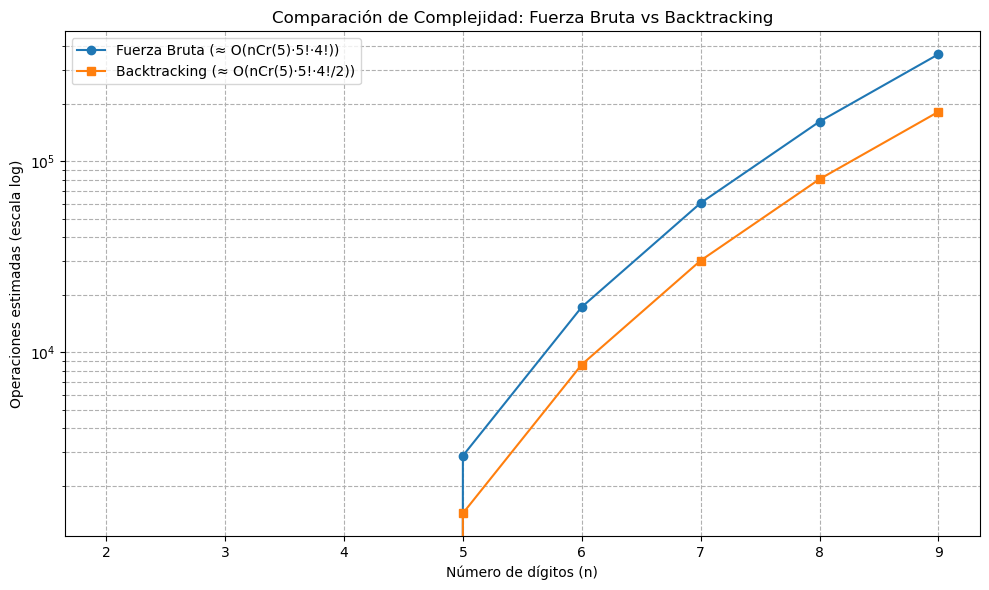

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Definimos valores de n (número de cifras seleccionadas de 1 a 9)
n_values = np.arange(2, 10)  # desde 2 hasta 9 cifras

# Complejidad fuerza bruta:
# C(n, 5) * 5! * 4! = combinaciones * permutaciones de cifras * permutaciones de operadores
fuerza_bruta = []
for n in n_values:
    if n >= 5:  # mínimo 5 cifras para formar expresiones
        combinaciones = math.comb(n, 5)
        perm_cifras = math.factorial(5)
        perm_ops = math.factorial(4)
        fuerza_bruta.append(combinaciones * perm_cifras * perm_ops)
    else:
        fuerza_bruta.append(0)

# Complejidad backtracking:
# También explora permutaciones válidas, pero evita caminos inválidos.
# Aproximamos su costo como: C(n,5) * (5! * 4!) / 2 (reducción aproximada por poda)
backtracking = []
for n in n_values:
    if n >= 5:
        combinaciones = math.comb(n, 5)
        perm_cifras = math.factorial(5)
        perm_ops = math.factorial(4)
        backtracking.append(combinaciones * perm_cifras * perm_ops // 2)
    else:
        backtracking.append(0)

# --- Gráfica ---
plt.figure(figsize=(10, 6))
plt.plot(n_values, fuerza_bruta, label='Fuerza Bruta (≈ O(nCr(5)·5!·4!))', marker='o')
plt.plot(n_values, backtracking, label='Backtracking (≈ O(nCr(5)·5!·4!/2))', marker='s')

plt.yscale('log')  # escala logarítmica para ver mejor el crecimiento
plt.xlabel('Número de dígitos (n)')
plt.ylabel('Operaciones estimadas (escala log)')
plt.title('Comparación de Complejidad: Fuerza Bruta vs Backtracking')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


# **-Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios y aplica el algoritmo al juego de datos generado**

El problema original pide analizar todas las expresiones válidas que pueden formarse con 5 cifras (de 1 a 9) y 4 operaciones, pero eso lleva a un espacio de búsqueda gigantesco. Generar un juego de datos aleatorios permite:

Probar el algoritmo en casos pequeños sin necesidad de recorrer el espacio completo.

In [10]:
import random

def generar_dato_entrada_aleatorio():
    cifras = random.sample(range(1, 10), 5)  # 5 cifras distintas del 1 al 9
    operaciones = random.sample(['+', '-', '*', '/'], 4)  # 4 operaciones distintas

    expresion = ""
    for i in range(5):
        expresion += str(cifras[i])
        if i < 4:
            expresion += operaciones[i]
    return expresion

# Generar 10 entradas de prueba pero puedo poner mas y me mostrara
for i in range(10):
    expr = generar_dato_entrada_aleatorio()
    try:
        valor = eval(expr)
        print(f"{i+1:2d}. {expr} = {valor}")
    except ZeroDivisionError:
        print(f"{i+1:2d}. {expr} → división por cero")

 1. 6/4+2-9*3 = -23.5
 2. 2/6-8+4*1 = -3.666666666666667
 3. 4/1+5*9-3 = 46.0
 4. 1+7*9-4/3 = 62.666666666666664
 5. 6*5-4/1+2 = 28.0
 6. 2/1*8-4+3 = 15.0
 7. 2+1/8-4*3 = -9.875
 8. 6*2/3-1+4 = 7.0
 9. 5-2+4*6/3 = 11.0
10. 8*5+1-2/3 = 40.333333333333336


# **-Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo**



1.   Cormen, TH, Leiserson, CE, Rivest, RL y Stein, C. (2022). Introducción a los algoritmos . Prensa del MIT.
2.   Tardos, J. K. É. Algorithm Design Jon Kleinberg Éva Tardos First Edition.
3.   Knuth, D. E. (2013). Art of Computer Programming, Volume 4, Fascicle 4, The: Generating All Trees--History of Combinatorial Generation. Addison-Wesley Professional.
4.   Kondrak, G., & Van Beek, P. (1997). A theoretical evaluation of selected backtracking algorithms. Artificial Intelligence, 89(1-2), 365-387.


# **-Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño**

El estudio de este problema puede avanzar en varias direcciones. En primer lugar, resulta importante pensar en la optimización algorítmica. Aunque la fuerza bruta garantiza recorrer todo el espacio de soluciones, su complejidad crece factorialmente y se vuelve poco escalable. Una línea clara de avance consiste en explorar estrategias de poda sistemática dentro del backtracking, de manera que se evalúen tempranamente condiciones de inviabilidad y así se eviten ramas redundantes que no conducen a una solución válida.

Otra forma de avanzar es considerar variaciones del problema. Por ejemplo, si se aumentara el número de cifras u operadores, o si se permitiera la repetición de estos, el espacio de búsqueda crecería de manera considerable, lo que obligaría a diseñar algoritmos aún más eficientes. También se podría incluir el uso de paréntesis para introducir jerarquía de operaciones explícita, lo cual multiplicaría la cantidad de expresiones válidas y acercaría el problema al análisis de árboles de expresión. Asimismo, podría explorarse la resolución en otros dominios numéricos, como los resultados racionales mediante fracciones o incluso bajo aritmética modular.